In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((73*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(394, 100, 100)


In [17]:
print(y_test.shape)

(44, 100, 100)


In [18]:
print(x_train.shape)

(394, 15, 1)


In [19]:
print(x_test.shape)

(44, 15, 1)


In [20]:
theta_train.shape

(394,)

In [21]:
tsr_train.shape

(394,)

In [22]:
tsr_test[10]

1.8

In [23]:
tsr_test[18]

1.6

In [24]:
theta_test[10]

360.0

In [25]:
theta_test[18]

0.0

In [26]:
os.chdir('C:\\Users\\User')

In [27]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fifthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [28]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [29]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [30]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [31]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((394, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((44, 2, 1))

In [32]:
tsr_theta_train.shape

(394, 2, 1)

In [33]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 7ms/step - loss: 0.0110 - rmse: 0.1040
Epoch 2/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0108 - rmse: 0.1028
Epoch 3/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0102 - rmse: 0.1000
Epoch 4/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0089 - rmse: 0.0933
Epoch 5/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0077 - rmse: 0.0868
Epoch 6/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0843
Epoch 7/10000
10/10 [==============================] - 0s 13ms/step - loss: 0.0073 - rmse: 0.0841
Epoch 8/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0073 - rmse: 0.0840
Epoch 9/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 10/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0072 - rmse: 0.0839
Epoch 11/10000
10/10 [======

10/10 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0789
Epoch 85/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0788
Epoch 86/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0787
Epoch 87/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0787
Epoch 88/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0064 - rmse: 0.0786
Epoch 89/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0785
Epoch 90/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0785
Epoch 91/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0784
Epoch 92/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0785
Epoch 93/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0063 - rmse: 0.0783
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0669
Epoch 168/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0668
Epoch 169/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0668
Epoch 170/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0046 - rmse: 0.0664
Epoch 171/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0660
Epoch 172/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0657
Epoch 173/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0654
Epoch 174/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0650
Epoch 175/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0646
Epoch 176/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0043 - rmse: 0.0643
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0422
Epoch 250/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0420
Epoch 251/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0417
Epoch 252/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0418
Epoch 253/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0019 - rmse: 0.0413
Epoch 254/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0412
Epoch 255/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0410
Epoch 256/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0408
Epoch 257/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0018 - rmse: 0.0407
Epoch 258/10000
10/10 [==============================] - 0s 7ms/step - loss: 0.0018 - rmse: 0.0405
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0300
Epoch 332/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0301
Epoch 333/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0299
Epoch 334/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0298
Epoch 335/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0298
Epoch 336/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0297
Epoch 337/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0296
Epoch 338/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0294
Epoch 339/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0010 - rmse: 0.0294
Epoch 340/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9931e-04 - rmse: 0.0293
Epoch 341/10000
10/10 

10/10 [==============================] - 0s 6ms/step - loss: 7.0423e-04 - rmse: 0.0239
Epoch 412/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0182e-04 - rmse: 0.0239
Epoch 413/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0468e-04 - rmse: 0.0239
Epoch 414/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2038e-04 - rmse: 0.0243
Epoch 415/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1140e-04 - rmse: 0.0241
Epoch 416/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2460e-04 - rmse: 0.0244
Epoch 417/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1784e-04 - rmse: 0.0242
Epoch 418/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9819e-04 - rmse: 0.0238
Epoch 419/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8372e-04 - rmse: 0.0235
Epoch 420/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8574e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 5.2722e-04 - rmse: 0.0201
Epoch 491/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2098e-04 - rmse: 0.0199
Epoch 492/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.3986e-04 - rmse: 0.0204
Epoch 493/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5020e-04 - rmse: 0.0206
Epoch 494/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2679e-04 - rmse: 0.0201
Epoch 495/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.2079e-04 - rmse: 0.0199
Epoch 496/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1960e-04 - rmse: 0.0199
Epoch 497/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.1641e-04 - rmse: 0.0198
Epoch 498/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0883e-04 - rmse: 0.0196
Epoch 499/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.0349e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 4.1191e-04 - rmse: 0.0171
Epoch 570/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0872e-04 - rmse: 0.0170
Epoch 571/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0296e-04 - rmse: 0.0169
Epoch 572/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0086e-04 - rmse: 0.0168
Epoch 573/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9691e-04 - rmse: 0.0167
Epoch 574/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9417e-04 - rmse: 0.0166
Epoch 575/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.9877e-04 - rmse: 0.0167
Epoch 576/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0362e-04 - rmse: 0.0169
Epoch 577/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0458e-04 - rmse: 0.0169
Epoch 578/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.0158e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 3.6129e-04 - rmse: 0.0157
Epoch 649/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.5421e-04 - rmse: 0.0155
Epoch 650/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.4445e-04 - rmse: 0.0152
Epoch 651/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3853e-04 - rmse: 0.0150
Epoch 652/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3810e-04 - rmse: 0.0150
Epoch 653/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3460e-04 - rmse: 0.0149
Epoch 654/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3858e-04 - rmse: 0.0150
Epoch 655/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3503e-04 - rmse: 0.0149
Epoch 656/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.2779e-04 - rmse: 0.0146
Epoch 657/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.3101e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 2.9091e-04 - rmse: 0.0134
Epoch 728/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9673e-04 - rmse: 0.0136
Epoch 729/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9712e-04 - rmse: 0.0137
Epoch 730/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9576e-04 - rmse: 0.0136
Epoch 731/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9193e-04 - rmse: 0.0135
Epoch 732/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9415e-04 - rmse: 0.0136
Epoch 733/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9553e-04 - rmse: 0.0136
Epoch 734/10000
10/10 [==============================] - 0s 7ms/step - loss: 2.9765e-04 - rmse: 0.0137
Epoch 735/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9550e-04 - rmse: 0.0136
Epoch 736/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.8398e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 2.6159e-04 - rmse: 0.0124
Epoch 807/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6028e-04 - rmse: 0.0124
Epoch 808/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6242e-04 - rmse: 0.0124
Epoch 809/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6384e-04 - rmse: 0.0125
Epoch 810/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6988e-04 - rmse: 0.0127
Epoch 811/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6759e-04 - rmse: 0.0126
Epoch 812/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6387e-04 - rmse: 0.0125
Epoch 813/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6932e-04 - rmse: 0.0127
Epoch 814/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6714e-04 - rmse: 0.0126
Epoch 815/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6865e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 2.3438e-04 - rmse: 0.0114
Epoch 886/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3723e-04 - rmse: 0.0115
Epoch 887/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3781e-04 - rmse: 0.0115
Epoch 888/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3799e-04 - rmse: 0.0115
Epoch 889/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3797e-04 - rmse: 0.0115
Epoch 890/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4040e-04 - rmse: 0.0116
Epoch 891/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4276e-04 - rmse: 0.0117
Epoch 892/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5068e-04 - rmse: 0.0121
Epoch 893/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4244e-04 - rmse: 0.0117
Epoch 894/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4008e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 2.3955e-04 - rmse: 0.0117
Epoch 965/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4113e-04 - rmse: 0.0117
Epoch 966/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4242e-04 - rmse: 0.0118
Epoch 967/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4211e-04 - rmse: 0.0118
Epoch 968/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3572e-04 - rmse: 0.0115
Epoch 969/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5798e-04 - rmse: 0.0124
Epoch 970/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.6511e-04 - rmse: 0.0127
Epoch 971/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4780e-04 - rmse: 0.0120
Epoch 972/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3936e-04 - rmse: 0.0117
Epoch 973/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2780e-04 -

10/10 [==============================] - 0s 6ms/step - loss: 2.2940e-04 - rmse: 0.0113
Epoch 1044/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1485e-04 - rmse: 0.0106
Epoch 1045/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1414e-04 - rmse: 0.0106
Epoch 1046/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1493e-04 - rmse: 0.0106
Epoch 1047/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1294e-04 - rmse: 0.0105
Epoch 1048/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1303e-04 - rmse: 0.0105
Epoch 1049/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1326e-04 - rmse: 0.0106
Epoch 1050/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1114e-04 - rmse: 0.0105
Epoch 1051/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1679e-04 - rmse: 0.0107
Epoch 1052/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2

10/10 [==============================] - 0s 6ms/step - loss: 1.9909e-04 - rmse: 0.0099
Epoch 1122/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0107e-04 - rmse: 0.0100
Epoch 1123/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9893e-04 - rmse: 0.0099
Epoch 1124/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1064e-04 - rmse: 0.0105
Epoch 1125/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1084e-04 - rmse: 0.0105
Epoch 1126/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1441e-04 - rmse: 0.0107
Epoch 1127/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0865e-04 - rmse: 0.0104
Epoch 1128/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1333e-04 - rmse: 0.0106
Epoch 1129/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0951e-04 - rmse: 0.0104
Epoch 1130/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0

10/10 [==============================] - 0s 6ms/step - loss: 2.0075e-04 - rmse: 0.0101
Epoch 1200/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9827e-04 - rmse: 0.0099
Epoch 1201/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9613e-04 - rmse: 0.0098
Epoch 1202/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8612e-04 - rmse: 0.0093
Epoch 1203/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8808e-04 - rmse: 0.0094
Epoch 1204/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0195e-04 - rmse: 0.0101
Epoch 1205/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0104e-04 - rmse: 0.0101
Epoch 1206/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9610e-04 - rmse: 0.0098
Epoch 1207/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0346e-04 - rmse: 0.0102
Epoch 1208/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0

10/10 [==============================] - 0s 6ms/step - loss: 1.8105e-04 - rmse: 0.0091
Epoch 1278/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8002e-04 - rmse: 0.0090
Epoch 1279/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7897e-04 - rmse: 0.0090
Epoch 1280/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8300e-04 - rmse: 0.0092
Epoch 1281/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7897e-04 - rmse: 0.0090
Epoch 1282/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8048e-04 - rmse: 0.0091
Epoch 1283/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8310e-04 - rmse: 0.0092
Epoch 1284/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8331e-04 - rmse: 0.0092
Epoch 1285/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8597e-04 - rmse: 0.0094
Epoch 1286/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8

10/10 [==============================] - 0s 6ms/step - loss: 2.1733e-04 - rmse: 0.0109
Epoch 1356/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8931e-04 - rmse: 0.0096
Epoch 1357/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9682e-04 - rmse: 0.0100
Epoch 1358/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9324e-04 - rmse: 0.0098
Epoch 1359/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8266e-04 - rmse: 0.0092
Epoch 1360/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8654e-04 - rmse: 0.0094
Epoch 1361/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7879e-04 - rmse: 0.0090
Epoch 1362/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8390e-04 - rmse: 0.0093
Epoch 1363/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8860e-04 - rmse: 0.0095
Epoch 1364/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8

10/10 [==============================] - 0s 6ms/step - loss: 1.9822e-04 - rmse: 0.0101
Epoch 1434/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8872e-04 - rmse: 0.0096
Epoch 1435/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8387e-04 - rmse: 0.0093
Epoch 1436/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8075e-04 - rmse: 0.0092
Epoch 1437/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7589e-04 - rmse: 0.0089
Epoch 1438/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8300e-04 - rmse: 0.0093
Epoch 1439/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7432e-04 - rmse: 0.0088
Epoch 1440/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7347e-04 - rmse: 0.0088
Epoch 1441/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7662e-04 - rmse: 0.0089
Epoch 1442/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8

10/10 [==============================] - 0s 6ms/step - loss: 1.6345e-04 - rmse: 0.0082
Epoch 1512/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6898e-04 - rmse: 0.0085
Epoch 1513/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6857e-04 - rmse: 0.0085
Epoch 1514/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6657e-04 - rmse: 0.0084
Epoch 1515/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6395e-04 - rmse: 0.0082
Epoch 1516/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7121e-04 - rmse: 0.0087
Epoch 1517/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6628e-04 - rmse: 0.0084
Epoch 1518/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6337e-04 - rmse: 0.0082
Epoch 1519/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6296e-04 - rmse: 0.0082
Epoch 1520/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6

10/10 [==============================] - 0s 6ms/step - loss: 1.6124e-04 - rmse: 0.0081
Epoch 1590/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5846e-04 - rmse: 0.0079
Epoch 1591/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6264e-04 - rmse: 0.0082
Epoch 1592/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6442e-04 - rmse: 0.0083
Epoch 1593/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6424e-04 - rmse: 0.0083
Epoch 1594/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6447e-04 - rmse: 0.0083
Epoch 1595/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5716e-04 - rmse: 0.0079
Epoch 1596/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5274e-04 - rmse: 0.0076
Epoch 1597/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5628e-04 - rmse: 0.0078
Epoch 1598/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6

10/10 [==============================] - 0s 6ms/step - loss: 1.5892e-04 - rmse: 0.0080
Epoch 1668/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5713e-04 - rmse: 0.0079
Epoch 1669/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6218e-04 - rmse: 0.0082
Epoch 1670/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6438e-04 - rmse: 0.0084
Epoch 1671/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7136e-04 - rmse: 0.0088
Epoch 1672/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6531e-04 - rmse: 0.0084
Epoch 1673/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6564e-04 - rmse: 0.0084
Epoch 1674/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6310e-04 - rmse: 0.0083
Epoch 1675/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6248e-04 - rmse: 0.0082
Epoch 1676/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6

10/10 [==============================] - 0s 6ms/step - loss: 1.5893e-04 - rmse: 0.0081
Epoch 1746/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5549e-04 - rmse: 0.0078
Epoch 1747/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5944e-04 - rmse: 0.0081
Epoch 1748/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6550e-04 - rmse: 0.0085
Epoch 1749/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5977e-04 - rmse: 0.0081
Epoch 1750/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5784e-04 - rmse: 0.0080
Epoch 1751/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5389e-04 - rmse: 0.0077
Epoch 1752/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5052e-04 - rmse: 0.0075
Epoch 1753/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5501e-04 - rmse: 0.0078
Epoch 1754/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5

10/10 [==============================] - 0s 6ms/step - loss: 1.5039e-04 - rmse: 0.0075
Epoch 1824/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5668e-04 - rmse: 0.0080
Epoch 1825/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6357e-04 - rmse: 0.0084
Epoch 1826/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7736e-04 - rmse: 0.0092
Epoch 1827/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6036e-04 - rmse: 0.0082
Epoch 1828/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6055e-04 - rmse: 0.0082
Epoch 1829/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5479e-04 - rmse: 0.0078
Epoch 1830/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5093e-04 - rmse: 0.0076
Epoch 1831/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5342e-04 - rmse: 0.0078
Epoch 1832/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4

10/10 [==============================] - 0s 6ms/step - loss: 1.6375e-04 - rmse: 0.0084
Epoch 1902/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5668e-04 - rmse: 0.0080
Epoch 1903/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6227e-04 - rmse: 0.0083
Epoch 1904/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5630e-04 - rmse: 0.0080
Epoch 1905/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6397e-04 - rmse: 0.0084
Epoch 1906/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6161e-04 - rmse: 0.0083
Epoch 1907/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5859e-04 - rmse: 0.0081
Epoch 1908/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5718e-04 - rmse: 0.0080
Epoch 1909/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5661e-04 - rmse: 0.0080
Epoch 1910/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5

10/10 [==============================] - 0s 6ms/step - loss: 1.5447e-04 - rmse: 0.0079
Epoch 1980/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5186e-04 - rmse: 0.0077
Epoch 1981/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5819e-04 - rmse: 0.0081
Epoch 1982/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4670e-04 - rmse: 0.0074
Epoch 1983/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5255e-04 - rmse: 0.0078
Epoch 1984/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5212e-04 - rmse: 0.0077
Epoch 1985/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4621e-04 - rmse: 0.0074
Epoch 1986/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4556e-04 - rmse: 0.0073
Epoch 1987/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4271e-04 - rmse: 0.0071
Epoch 1988/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4

10/10 [==============================] - 0s 7ms/step - loss: 1.4293e-04 - rmse: 0.0072
Epoch 2058/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4494e-04 - rmse: 0.0073
Epoch 2059/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5103e-04 - rmse: 0.0077
Epoch 2060/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.4581e-04 - rmse: 0.0074
Epoch 2061/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4153e-04 - rmse: 0.0071
Epoch 2062/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4778e-04 - rmse: 0.0075
Epoch 2063/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5772e-04 - rmse: 0.0081
Epoch 2064/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.5345e-04 - rmse: 0.0079
Epoch 2065/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5558e-04 - rmse: 0.0080
Epoch 2066/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5

10/10 [==============================] - 0s 6ms/step - loss: 1.4170e-04 - rmse: 0.0071
Epoch 2136/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3408e-04 - rmse: 0.0066
Epoch 2137/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3855e-04 - rmse: 0.0069
Epoch 2138/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3598e-04 - rmse: 0.0067
Epoch 2139/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3696e-04 - rmse: 0.0068
Epoch 2140/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4873e-04 - rmse: 0.0076
Epoch 2141/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5430e-04 - rmse: 0.0080
Epoch 2142/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4576e-04 - rmse: 0.0074
Epoch 2143/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4008e-04 - rmse: 0.0070
Epoch 2144/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4

10/10 [==============================] - 0s 6ms/step - loss: 1.4241e-04 - rmse: 0.0072
Epoch 2214/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3672e-04 - rmse: 0.0068
Epoch 2215/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3578e-04 - rmse: 0.0067
Epoch 2216/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3731e-04 - rmse: 0.0068
Epoch 2217/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4953e-04 - rmse: 0.0077
Epoch 2218/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5807e-04 - rmse: 0.0082
Epoch 2219/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4387e-04 - rmse: 0.0073
Epoch 2220/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3947e-04 - rmse: 0.0070
Epoch 2221/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3279e-04 - rmse: 0.0065
Epoch 2222/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2

10/10 [==============================] - 0s 6ms/step - loss: 1.4010e-04 - rmse: 0.0071
Epoch 2292/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3826e-04 - rmse: 0.0070
Epoch 2293/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3607e-04 - rmse: 0.0068
Epoch 2294/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3408e-04 - rmse: 0.0066
Epoch 2295/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4213e-04 - rmse: 0.0072
Epoch 2296/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3899e-04 - rmse: 0.0070
Epoch 2297/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3882e-04 - rmse: 0.0070
Epoch 2298/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3817e-04 - rmse: 0.0069
Epoch 2299/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3892e-04 - rmse: 0.0070
Epoch 2300/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4

10/10 [==============================] - 0s 6ms/step - loss: 1.4095e-04 - rmse: 0.0072
Epoch 2370/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3917e-04 - rmse: 0.0071
Epoch 2371/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3246e-04 - rmse: 0.0066
Epoch 2372/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3341e-04 - rmse: 0.0066
Epoch 2373/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3659e-04 - rmse: 0.0069
Epoch 2374/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4168e-04 - rmse: 0.0072
Epoch 2375/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3505e-04 - rmse: 0.0068
Epoch 2376/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2980e-04 - rmse: 0.0064
Epoch 2377/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2781e-04 - rmse: 0.0062
Epoch 2378/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3

10/10 [==============================] - 0s 6ms/step - loss: 1.3231e-04 - rmse: 0.0066
Epoch 2448/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2710e-04 - rmse: 0.0062
Epoch 2449/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3773e-04 - rmse: 0.0070
Epoch 2450/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3202e-04 - rmse: 0.0066
Epoch 2451/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3478e-04 - rmse: 0.0068
Epoch 2452/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3887e-04 - rmse: 0.0071
Epoch 2453/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4119e-04 - rmse: 0.0072
Epoch 2454/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4601e-04 - rmse: 0.0076
Epoch 2455/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4906e-04 - rmse: 0.0078
Epoch 2456/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4

10/10 [==============================] - 0s 6ms/step - loss: 1.3030e-04 - rmse: 0.0065
Epoch 2526/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2814e-04 - rmse: 0.0063
Epoch 2527/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2787e-04 - rmse: 0.0063
Epoch 2528/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2869e-04 - rmse: 0.0064
Epoch 2529/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3270e-04 - rmse: 0.0067
Epoch 2530/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3171e-04 - rmse: 0.0066
Epoch 2531/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3080e-04 - rmse: 0.0065
Epoch 2532/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3082e-04 - rmse: 0.0065
Epoch 2533/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3202e-04 - rmse: 0.0066
Epoch 2534/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3

10/10 [==============================] - 0s 6ms/step - loss: 1.3857e-04 - rmse: 0.0071
Epoch 2604/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4887e-04 - rmse: 0.0078
Epoch 2605/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5904e-04 - rmse: 0.0084
Epoch 2606/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5560e-04 - rmse: 0.0082
Epoch 2607/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3455e-04 - rmse: 0.0068
Epoch 2608/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3049e-04 - rmse: 0.0065
Epoch 2609/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3642e-04 - rmse: 0.0070
Epoch 2610/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3139e-04 - rmse: 0.0066
Epoch 2611/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3367e-04 - rmse: 0.0068
Epoch 2612/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3

10/10 [==============================] - 0s 6ms/step - loss: 1.3441e-04 - rmse: 0.0069
Epoch 2682/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3322e-04 - rmse: 0.0068
Epoch 2683/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3473e-04 - rmse: 0.0069
Epoch 2684/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2867e-04 - rmse: 0.0064
Epoch 2685/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3171e-04 - rmse: 0.0067
Epoch 2686/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3478e-04 - rmse: 0.0069
Epoch 2687/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2981e-04 - rmse: 0.0065
Epoch 2688/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3018e-04 - rmse: 0.0065
Epoch 2689/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4599e-04 - rmse: 0.0077
Epoch 2690/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3

10/10 [==============================] - 0s 6ms/step - loss: 1.2561e-04 - rmse: 0.0062
Epoch 2760/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2553e-04 - rmse: 0.0062
Epoch 2761/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2881e-04 - rmse: 0.0065
Epoch 2762/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2502e-04 - rmse: 0.0062
Epoch 2763/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2184e-04 - rmse: 0.0059
Epoch 2764/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1920e-04 - rmse: 0.0057
Epoch 2765/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1965e-04 - rmse: 0.0057
Epoch 2766/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2753e-04 - rmse: 0.0064
Epoch 2767/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2854e-04 - rmse: 0.0065
Epoch 2768/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2

10/10 [==============================] - 0s 6ms/step - loss: 1.4231e-04 - rmse: 0.0075
Epoch 2838/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3692e-04 - rmse: 0.0071
Epoch 2839/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2836e-04 - rmse: 0.0065
Epoch 2840/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2909e-04 - rmse: 0.0065
Epoch 2841/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2796e-04 - rmse: 0.0065
Epoch 2842/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2755e-04 - rmse: 0.0064
Epoch 2843/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2724e-04 - rmse: 0.0064
Epoch 2844/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2940e-04 - rmse: 0.0066
Epoch 2845/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3644e-04 - rmse: 0.0071
Epoch 2846/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3

10/10 [==============================] - 0s 6ms/step - loss: 1.1852e-04 - rmse: 0.0057
Epoch 2916/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1795e-04 - rmse: 0.0057
Epoch 2917/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1905e-04 - rmse: 0.0058
Epoch 2918/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3126e-04 - rmse: 0.0067
Epoch 2919/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3054e-04 - rmse: 0.0067
Epoch 2920/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2287e-04 - rmse: 0.0061
Epoch 2921/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2785e-04 - rmse: 0.0065
Epoch 2922/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3637e-04 - rmse: 0.0071
Epoch 2923/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7382e-04 - rmse: 0.0094
Epoch 2924/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8

10/10 [==============================] - 0s 6ms/step - loss: 1.3233e-04 - rmse: 0.0068
Epoch 2994/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2671e-04 - rmse: 0.0064
Epoch 2995/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3180e-04 - rmse: 0.0068
Epoch 2996/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5134e-04 - rmse: 0.0081
Epoch 2997/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3085e-04 - rmse: 0.0067
Epoch 2998/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2908e-04 - rmse: 0.0066
Epoch 2999/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2598e-04 - rmse: 0.0064
Epoch 3000/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2385e-04 - rmse: 0.0062
Epoch 3001/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2133e-04 - rmse: 0.0060
Epoch 3002/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4

10/10 [==============================] - 0s 6ms/step - loss: 1.3382e-04 - rmse: 0.0070
Epoch 3072/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.3534e-04 - rmse: 0.0071
Epoch 3073/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.2719e-04 - rmse: 0.0065
Epoch 3074/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2429e-04 - rmse: 0.0063
Epoch 3075/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2142e-04 - rmse: 0.0060
Epoch 3076/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2276e-04 - rmse: 0.0061
Epoch 3077/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2320e-04 - rmse: 0.0062
Epoch 3078/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2595e-04 - rmse: 0.0064
Epoch 3079/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2367e-04 - rmse: 0.0062
Epoch 3080/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3

10/10 [==============================] - 0s 6ms/step - loss: 1.2184e-04 - rmse: 0.0061
Epoch 3150/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2302e-04 - rmse: 0.0062
Epoch 3151/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2536e-04 - rmse: 0.0064
Epoch 3152/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1959e-04 - rmse: 0.0059
Epoch 3153/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3228e-04 - rmse: 0.0069
Epoch 3154/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3436e-04 - rmse: 0.0071
Epoch 3155/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2800e-04 - rmse: 0.0066
Epoch 3156/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2947e-04 - rmse: 0.0067
Epoch 3157/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3523e-04 - rmse: 0.0071
Epoch 3158/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3

10/10 [==============================] - 0s 6ms/step - loss: 1.1608e-04 - rmse: 0.0057
Epoch 3228/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1177e-04 - rmse: 0.0053
Epoch 3229/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2147e-04 - rmse: 0.0061
Epoch 3230/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2175e-04 - rmse: 0.0061
Epoch 3231/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2368e-04 - rmse: 0.0063
Epoch 3232/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1930e-04 - rmse: 0.0059
Epoch 3233/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1721e-04 - rmse: 0.0058
Epoch 3234/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2071e-04 - rmse: 0.0061
Epoch 3235/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1566e-04 - rmse: 0.0056
Epoch 3236/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1

10/10 [==============================] - 0s 6ms/step - loss: 1.1833e-04 - rmse: 0.0059
Epoch 3306/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1342e-04 - rmse: 0.0055
Epoch 3307/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1457e-04 - rmse: 0.0056
Epoch 3308/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1876e-04 - rmse: 0.0059
Epoch 3309/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1204e-04 - rmse: 0.0053
Epoch 3310/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1073e-04 - rmse: 0.0052
Epoch 3311/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1776e-04 - rmse: 0.0059
Epoch 3312/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2100e-04 - rmse: 0.0061
Epoch 3313/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1316e-04 - rmse: 0.0054
Epoch 3314/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1

10/10 [==============================] - 0s 6ms/step - loss: 1.1649e-04 - rmse: 0.0058
Epoch 3384/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1909e-04 - rmse: 0.0060
Epoch 3385/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1710e-04 - rmse: 0.0058
Epoch 3386/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1363e-04 - rmse: 0.0055
Epoch 3387/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1071e-04 - rmse: 0.0053
Epoch 3388/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0837e-04 - rmse: 0.0050
Epoch 3389/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1697e-04 - rmse: 0.0058
Epoch 3390/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2720e-04 - rmse: 0.0066
Epoch 3391/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2732e-04 - rmse: 0.0067
Epoch 3392/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1

10/10 [==============================] - 0s 6ms/step - loss: 1.1235e-04 - rmse: 0.0054
Epoch 3462/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1618e-04 - rmse: 0.0058
Epoch 3463/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1375e-04 - rmse: 0.0056
Epoch 3464/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1386e-04 - rmse: 0.0056
Epoch 3465/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1377e-04 - rmse: 0.0056
Epoch 3466/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1026e-04 - rmse: 0.0053
Epoch 3467/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2632e-04 - rmse: 0.0066
Epoch 3468/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2570e-04 - rmse: 0.0066
Epoch 3469/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1550e-04 - rmse: 0.0057
Epoch 3470/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1

10/10 [==============================] - 0s 6ms/step - loss: 1.2690e-04 - rmse: 0.0067
Epoch 3540/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2622e-04 - rmse: 0.0066
Epoch 3541/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1780e-04 - rmse: 0.0060
Epoch 3542/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1739e-04 - rmse: 0.0059
Epoch 3543/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1204e-04 - rmse: 0.0055
Epoch 3544/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1007e-04 - rmse: 0.0053
Epoch 3545/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0938e-04 - rmse: 0.0052
Epoch 3546/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1199e-04 - rmse: 0.0055
Epoch 3547/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2078e-04 - rmse: 0.0062
Epoch 3548/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1

10/10 [==============================] - 0s 6ms/step - loss: 1.3470e-04 - rmse: 0.0073
Epoch 3618/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2764e-04 - rmse: 0.0068
Epoch 3619/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2500e-04 - rmse: 0.0066
Epoch 3620/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2473e-04 - rmse: 0.0066
Epoch 3621/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1316e-04 - rmse: 0.0056
Epoch 3622/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2247e-04 - rmse: 0.0064
Epoch 3623/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1629e-04 - rmse: 0.0059
Epoch 3624/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2293e-04 - rmse: 0.0064
Epoch 3625/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2765e-04 - rmse: 0.0068
Epoch 3626/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2

10/10 [==============================] - 0s 6ms/step - loss: 1.0190e-04 - rmse: 0.0045
Epoch 3696/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1059e-04 - rmse: 0.0054
Epoch 3697/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0604e-04 - rmse: 0.0050
Epoch 3698/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1380e-04 - rmse: 0.0057
Epoch 3699/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1315e-04 - rmse: 0.0056
Epoch 3700/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1423e-04 - rmse: 0.0057
Epoch 3701/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1489e-04 - rmse: 0.0058
Epoch 3702/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4118e-04 - rmse: 0.0077
Epoch 3703/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3532e-04 - rmse: 0.0074
Epoch 3704/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3

10/10 [==============================] - 0s 6ms/step - loss: 1.2348e-04 - rmse: 0.0065
Epoch 3774/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1254e-04 - rmse: 0.0056
Epoch 3775/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1099e-04 - rmse: 0.0055
Epoch 3776/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1550e-04 - rmse: 0.0059
Epoch 3777/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1142e-04 - rmse: 0.0055
Epoch 3778/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0480e-04 - rmse: 0.0049
Epoch 3779/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0659e-04 - rmse: 0.0051
Epoch 3780/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0795e-04 - rmse: 0.0052
Epoch 3781/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1273e-04 - rmse: 0.0056
Epoch 3782/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1

10/10 [==============================] - 0s 6ms/step - loss: 1.1469e-04 - rmse: 0.0059
Epoch 3852/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2079e-04 - rmse: 0.0064
Epoch 3853/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1904e-04 - rmse: 0.0062
Epoch 3854/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1132e-04 - rmse: 0.0056
Epoch 3855/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1002e-04 - rmse: 0.0054
Epoch 3856/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1541e-04 - rmse: 0.0059
Epoch 3857/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2640e-04 - rmse: 0.0068
Epoch 3858/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1652e-04 - rmse: 0.0060
Epoch 3859/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1054e-04 - rmse: 0.0055
Epoch 3860/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1

10/10 [==============================] - 0s 6ms/step - loss: 1.1750e-04 - rmse: 0.0061
Epoch 3930/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3076e-04 - rmse: 0.0071
Epoch 3931/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2325e-04 - rmse: 0.0066
Epoch 3932/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1115e-04 - rmse: 0.0056
Epoch 3933/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0921e-04 - rmse: 0.0054
Epoch 3934/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0717e-04 - rmse: 0.0052
Epoch 3935/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1194e-04 - rmse: 0.0057
Epoch 3936/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0335e-04 - rmse: 0.0048
Epoch 3937/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0454e-04 - rmse: 0.0050
Epoch 3938/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 1.0106e-04 - rmse: 0.0046
Epoch 4008/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0114e-04 - rmse: 0.0047
Epoch 4009/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0956e-04 - rmse: 0.0055
Epoch 4010/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1952e-04 - rmse: 0.0063
Epoch 4011/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1237e-04 - rmse: 0.0057
Epoch 4012/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0352e-04 - rmse: 0.0049
Epoch 4013/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0782e-04 - rmse: 0.0053
Epoch 4014/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1019e-04 - rmse: 0.0055
Epoch 4015/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1106e-04 - rmse: 0.0056
Epoch 4016/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 1.1379e-04 - rmse: 0.0059
Epoch 4086/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0752e-04 - rmse: 0.0053
Epoch 4087/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0703e-04 - rmse: 0.0053
Epoch 4088/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.0591e-04 - rmse: 0.0052: 0s - loss: 1.0637e-04 - rmse: 0.00
Epoch 4089/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0025e-04 - rmse: 0.0046
Epoch 4090/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1128e-04 - rmse: 0.0057
Epoch 4091/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1131e-04 - rmse: 0.0057
Epoch 4092/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0537e-04 - rmse: 0.0051
Epoch 4093/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0706e-04 - rmse: 0.0053
Epoch 4094/10000
10/10 [=====================

10/10 [==============================] - 0s 6ms/step - loss: 1.0341e-04 - rmse: 0.0050
Epoch 4164/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0730e-04 - rmse: 0.0054
Epoch 4165/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0895e-04 - rmse: 0.0055
Epoch 4166/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0459e-04 - rmse: 0.0051
Epoch 4167/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9366e-05 - rmse: 0.0046
Epoch 4168/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0252e-04 - rmse: 0.0049
Epoch 4169/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0058e-04 - rmse: 0.0047
Epoch 4170/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8610e-05 - rmse: 0.0045
Epoch 4171/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0112e-04 - rmse: 0.0048
Epoch 4172/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1

10/10 [==============================] - 0s 6ms/step - loss: 9.8677e-05 - rmse: 0.0045
Epoch 4242/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0233e-04 - rmse: 0.0049
Epoch 4243/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6312e-05 - rmse: 0.0043
Epoch 4244/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5866e-05 - rmse: 0.0042
Epoch 4245/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9927e-05 - rmse: 0.0047
Epoch 4246/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0031e-04 - rmse: 0.0047
Epoch 4247/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1218e-04 - rmse: 0.0058
Epoch 4248/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0451e-04 - rmse: 0.0051
Epoch 4249/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0861e-04 - rmse: 0.0055
Epoch 4250/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 1.1833e-04 - rmse: 0.0064
Epoch 4320/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3845e-04 - rmse: 0.0078
Epoch 4321/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6889e-04 - rmse: 0.0096
Epoch 4322/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7013e-04 - rmse: 0.0096
Epoch 4323/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3547e-04 - rmse: 0.0076
Epoch 4324/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1813e-04 - rmse: 0.0064
Epoch 4325/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1556e-04 - rmse: 0.0062
Epoch 4326/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1185e-04 - rmse: 0.0059
Epoch 4327/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9700e-05 - rmse: 0.0047
Epoch 4328/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5

10/10 [==============================] - 0s 6ms/step - loss: 1.1906e-04 - rmse: 0.0065
Epoch 4398/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1576e-04 - rmse: 0.0062
Epoch 4399/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0380e-04 - rmse: 0.0052
Epoch 4400/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0009e-04 - rmse: 0.0048
Epoch 4401/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9454e-05 - rmse: 0.0047
Epoch 4402/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5576e-05 - rmse: 0.0043
Epoch 4403/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7188e-05 - rmse: 0.0045
Epoch 4404/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0911e-04 - rmse: 0.0057
Epoch 4405/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7613e-04 - rmse: 0.0100
Epoch 4406/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7

10/10 [==============================] - 0s 6ms/step - loss: 9.7396e-05 - rmse: 0.0046
Epoch 4476/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.9227e-05 - rmse: 0.0048
Epoch 4477/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7387e-05 - rmse: 0.0046
Epoch 4478/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0252e-04 - rmse: 0.0051
Epoch 4479/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0040e-04 - rmse: 0.0049
Epoch 4480/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0015e-04 - rmse: 0.0049
Epoch 4481/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8404e-05 - rmse: 0.0047
Epoch 4482/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.4674e-05 - rmse: 0.0043
Epoch 4483/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0050e-04 - rmse: 0.0049
Epoch 4484/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5

10/10 [==============================] - 0s 6ms/step - loss: 9.8653e-05 - rmse: 0.0047
Epoch 4554/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0791e-04 - rmse: 0.0056
Epoch 4555/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2074e-04 - rmse: 0.0067
Epoch 4556/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1171e-04 - rmse: 0.0060
Epoch 4557/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0943e-04 - rmse: 0.0058
Epoch 4558/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0906e-04 - rmse: 0.0057
Epoch 4559/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1243e-04 - rmse: 0.0060
Epoch 4560/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1212e-04 - rmse: 0.0060
Epoch 4561/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0714e-04 - rmse: 0.0056
Epoch 4562/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 9.7021e-05 - rmse: 0.0046
Epoch 4632/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2500e-05 - rmse: 0.0041
Epoch 4633/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8148e-05 - rmse: 0.0047
Epoch 4634/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6520e-05 - rmse: 0.0046
Epoch 4635/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0415e-04 - rmse: 0.0053
Epoch 4636/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0253e-04 - rmse: 0.0052
Epoch 4637/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9560e-05 - rmse: 0.0049
Epoch 4638/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8556e-05 - rmse: 0.0048
Epoch 4639/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5086e-05 - rmse: 0.0044
Epoch 4640/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.3

10/10 [==============================] - 0s 6ms/step - loss: 9.9311e-05 - rmse: 0.0049
Epoch 4710/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0457e-04 - rmse: 0.0054
Epoch 4711/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0161e-04 - rmse: 0.0051
Epoch 4712/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.4115e-05 - rmse: 0.0044
Epoch 4713/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0144e-05 - rmse: 0.0039
Epoch 4714/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9740e-05 - rmse: 0.0038
Epoch 4715/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1416e-05 - rmse: 0.0040
Epoch 4716/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2060e-05 - rmse: 0.0041
Epoch 4717/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1913e-05 - rmse: 0.0041
Epoch 4718/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1

10/10 [==============================] - 0s 6ms/step - loss: 9.3734e-05 - rmse: 0.0044
Epoch 4788/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0373e-05 - rmse: 0.0040
Epoch 4789/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0280e-05 - rmse: 0.0040
Epoch 4790/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8337e-05 - rmse: 0.0037
Epoch 4791/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7740e-05 - rmse: 0.0036
Epoch 4792/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5550e-05 - rmse: 0.0033
Epoch 4793/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6081e-05 - rmse: 0.0034
Epoch 4794/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6083e-05 - rmse: 0.0034
Epoch 4795/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6910e-05 - rmse: 0.0035
Epoch 4796/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7

10/10 [==============================] - 0s 6ms/step - loss: 9.8810e-05 - rmse: 0.0050
Epoch 4866/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.3966e-05 - rmse: 0.0044
Epoch 4867/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9266e-05 - rmse: 0.0039
Epoch 4868/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7572e-05 - rmse: 0.0037
Epoch 4869/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7965e-05 - rmse: 0.0037
Epoch 4870/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9064e-05 - rmse: 0.0039
Epoch 4871/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6888e-05 - rmse: 0.0036
Epoch 4872/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7499e-05 - rmse: 0.0037
Epoch 4873/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7489e-05 - rmse: 0.0037
Epoch 4874/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7

10/10 [==============================] - 0s 6ms/step - loss: 9.1210e-05 - rmse: 0.0042
Epoch 4944/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6614e-05 - rmse: 0.0036
Epoch 4945/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6928e-05 - rmse: 0.0036
Epoch 4946/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6667e-05 - rmse: 0.0036
Epoch 4947/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8218e-05 - rmse: 0.0038
Epoch 4948/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9335e-05 - rmse: 0.0040
Epoch 4949/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6703e-05 - rmse: 0.0036
Epoch 4950/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5362e-05 - rmse: 0.0034
Epoch 4951/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4797e-05 - rmse: 0.0033
Epoch 4952/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4

10/10 [==============================] - 0s 6ms/step - loss: 8.6043e-05 - rmse: 0.0036
Epoch 5022/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5761e-05 - rmse: 0.0035
Epoch 5023/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5256e-05 - rmse: 0.0035
Epoch 5024/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4787e-05 - rmse: 0.0034
Epoch 5025/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8295e-05 - rmse: 0.0039
Epoch 5026/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8512e-05 - rmse: 0.0039
Epoch 5027/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2425e-05 - rmse: 0.0044
Epoch 5028/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0762e-04 - rmse: 0.0059
Epoch 5029/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1665e-04 - rmse: 0.0066
Epoch 5030/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2

10/10 [==============================] - 0s 7ms/step - loss: 8.5958e-05 - rmse: 0.0036
Epoch 5100/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4973e-05 - rmse: 0.0035
Epoch 5101/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5256e-05 - rmse: 0.0035
Epoch 5102/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4572e-05 - rmse: 0.0034
Epoch 5103/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3178e-05 - rmse: 0.0032
Epoch 5104/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2632e-05 - rmse: 0.0032
Epoch 5105/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2663e-05 - rmse: 0.0032
Epoch 5106/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3564e-05 - rmse: 0.0033
Epoch 5107/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3320e-05 - rmse: 0.0033
Epoch 5108/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3

10/10 [==============================] - 0s 6ms/step - loss: 8.2355e-05 - rmse: 0.0032
Epoch 5178/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7975e-05 - rmse: 0.0040
Epoch 5179/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1960e-05 - rmse: 0.0044
Epoch 5180/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9844e-05 - rmse: 0.0042
Epoch 5181/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8409e-05 - rmse: 0.0040
Epoch 5182/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6578e-05 - rmse: 0.0038
Epoch 5183/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9646e-05 - rmse: 0.0042
Epoch 5184/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0777e-05 - rmse: 0.0043
Epoch 5185/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7810e-05 - rmse: 0.0051
Epoch 5186/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5

10/10 [==============================] - 0s 6ms/step - loss: 8.2322e-05 - rmse: 0.0033
Epoch 5256/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2526e-05 - rmse: 0.0033
Epoch 5257/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2220e-05 - rmse: 0.0032
Epoch 5258/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3559e-05 - rmse: 0.0034
Epoch 5259/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8855e-05 - rmse: 0.0041
Epoch 5260/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2740e-04 - rmse: 0.0075
Epoch 5261/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7643e-04 - rmse: 0.0102
Epoch 5262/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6553e-04 - rmse: 0.0097
Epoch 5263/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4636e-04 - rmse: 0.0086
Epoch 5264/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3

10/10 [==============================] - 0s 6ms/step - loss: 8.5894e-05 - rmse: 0.0038
Epoch 5334/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7518e-05 - rmse: 0.0040
Epoch 5335/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5169e-05 - rmse: 0.0049
Epoch 5336/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5008e-05 - rmse: 0.0049
Epoch 5337/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8313e-05 - rmse: 0.0041
Epoch 5338/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4412e-05 - rmse: 0.0036
Epoch 5339/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4073e-05 - rmse: 0.0036
Epoch 5340/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2370e-05 - rmse: 0.0033
Epoch 5341/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1498e-05 - rmse: 0.0032
Epoch 5342/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1

10/10 [==============================] - 0s 6ms/step - loss: 8.1859e-05 - rmse: 0.0033
Epoch 5412/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0701e-05 - rmse: 0.0031
Epoch 5413/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0465e-05 - rmse: 0.0031
Epoch 5414/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1515e-05 - rmse: 0.0033
Epoch 5415/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4588e-05 - rmse: 0.0037
Epoch 5416/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2625e-05 - rmse: 0.0034
Epoch 5417/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2635e-05 - rmse: 0.0034
Epoch 5418/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3366e-05 - rmse: 0.0035
Epoch 5419/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4942e-05 - rmse: 0.0038
Epoch 5420/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4

10/10 [==============================] - 0s 6ms/step - loss: 8.0765e-05 - rmse: 0.0032
Epoch 5490/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2178e-05 - rmse: 0.0034
Epoch 5491/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8581e-05 - rmse: 0.0043
Epoch 5492/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2175e-05 - rmse: 0.0047
Epoch 5493/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9426e-05 - rmse: 0.0044
Epoch 5494/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8604e-05 - rmse: 0.0043
Epoch 5495/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5976e-05 - rmse: 0.0040
Epoch 5496/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2911e-05 - rmse: 0.0035
Epoch 5497/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2914e-05 - rmse: 0.0035
Epoch 5498/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7

10/10 [==============================] - 0s 6ms/step - loss: 8.5054e-05 - rmse: 0.0039
Epoch 5568/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4328e-05 - rmse: 0.0038
Epoch 5569/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3004e-05 - rmse: 0.0036
Epoch 5570/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0898e-05 - rmse: 0.0033
Epoch 5571/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9715e-05 - rmse: 0.0031
Epoch 5572/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0306e-05 - rmse: 0.0032
Epoch 5573/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9895e-05 - rmse: 0.0032
Epoch 5574/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9353e-05 - rmse: 0.0031
Epoch 5575/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0165e-05 - rmse: 0.0032
Epoch 5576/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2

10/10 [==============================] - 0s 6ms/step - loss: 8.9790e-05 - rmse: 0.0045
Epoch 5646/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6051e-05 - rmse: 0.0041
Epoch 5647/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4158e-05 - rmse: 0.0038
Epoch 5648/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.1720e-05 - rmse: 0.0035
Epoch 5649/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0539e-05 - rmse: 0.0033
Epoch 5650/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0006e-05 - rmse: 0.0033
Epoch 5651/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9106e-05 - rmse: 0.0031
Epoch 5652/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9168e-05 - rmse: 0.0031
Epoch 5653/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8505e-05 - rmse: 0.0030
Epoch 5654/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8

10/10 [==============================] - 0s 6ms/step - loss: 7.7592e-05 - rmse: 0.0029
Epoch 5724/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7577e-05 - rmse: 0.0029
Epoch 5725/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9227e-05 - rmse: 0.0032
Epoch 5726/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9962e-05 - rmse: 0.0033
Epoch 5727/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.9705e-05 - rmse: 0.0033
Epoch 5728/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3781e-05 - rmse: 0.0038
Epoch 5729/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5927e-05 - rmse: 0.0041
Epoch 5730/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3176e-05 - rmse: 0.0038
Epoch 5731/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3133e-05 - rmse: 0.0038
Epoch 5732/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1

10/10 [==============================] - 0s 6ms/step - loss: 7.8002e-05 - rmse: 0.0031
Epoch 5802/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7167e-05 - rmse: 0.0029
Epoch 5803/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6887e-05 - rmse: 0.0029
Epoch 5804/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7657e-05 - rmse: 0.0030
Epoch 5805/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7415e-05 - rmse: 0.0030
Epoch 5806/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7665e-05 - rmse: 0.0030
Epoch 5807/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7814e-05 - rmse: 0.0030
Epoch 5808/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7229e-05 - rmse: 0.0030
Epoch 5809/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6886e-05 - rmse: 0.0029
Epoch 5810/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6

10/10 [==============================] - 0s 6ms/step - loss: 1.2358e-04 - rmse: 0.0074
Epoch 5880/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0729e-04 - rmse: 0.0063
Epoch 5881/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8238e-05 - rmse: 0.0055
Epoch 5882/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8706e-05 - rmse: 0.0045
Epoch 5883/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2571e-05 - rmse: 0.0038
Epoch 5884/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0457e-05 - rmse: 0.0035
Epoch 5885/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9008e-05 - rmse: 0.0033
Epoch 5886/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9517e-05 - rmse: 0.0034
Epoch 5887/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0547e-05 - rmse: 0.0035
Epoch 5888/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8

10/10 [==============================] - 0s 6ms/step - loss: 7.6612e-05 - rmse: 0.0030
Epoch 5958/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6769e-05 - rmse: 0.0030
Epoch 5959/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8177e-05 - rmse: 0.0033
Epoch 5960/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9458e-05 - rmse: 0.0035
Epoch 5961/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9875e-05 - rmse: 0.0035
Epoch 5962/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3951e-05 - rmse: 0.0041
Epoch 5963/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8457e-05 - rmse: 0.0046
Epoch 5964/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7377e-05 - rmse: 0.0055
Epoch 5965/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.4316e-05 - rmse: 0.0052
Epoch 5966/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.4

10/10 [==============================] - 0s 6ms/step - loss: 7.6140e-05 - rmse: 0.0030
Epoch 6036/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5453e-05 - rmse: 0.0029
Epoch 6037/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5075e-05 - rmse: 0.0028
Epoch 6038/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5092e-05 - rmse: 0.0028
Epoch 6039/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4872e-05 - rmse: 0.0028
Epoch 6040/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4790e-05 - rmse: 0.0028
Epoch 6041/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4673e-05 - rmse: 0.0027
Epoch 6042/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5127e-05 - rmse: 0.0028
Epoch 6043/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7645e-05 - rmse: 0.0032
Epoch 6044/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8

10/10 [==============================] - 0s 6ms/step - loss: 7.5547e-05 - rmse: 0.0030
Epoch 6114/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4742e-05 - rmse: 0.0028
Epoch 6115/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4771e-05 - rmse: 0.0028
Epoch 6116/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5554e-05 - rmse: 0.0030
Epoch 6117/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5885e-05 - rmse: 0.0030
Epoch 6118/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8767e-05 - rmse: 0.0035
Epoch 6119/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9238e-05 - rmse: 0.0035
Epoch 6120/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3429e-05 - rmse: 0.0041
Epoch 6121/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2424e-05 - rmse: 0.0040
Epoch 6122/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1

10/10 [==============================] - 0s 6ms/step - loss: 2.0259e-04 - rmse: 0.0117
Epoch 6192/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4159e-04 - rmse: 0.0132
Epoch 6193/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5710e-04 - rmse: 0.0138
Epoch 6194/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7795e-04 - rmse: 0.0106
Epoch 6195/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3712e-04 - rmse: 0.0084
Epoch 6196/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2268e-04 - rmse: 0.0075
Epoch 6197/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0392e-04 - rmse: 0.0061
Epoch 6198/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1715e-04 - rmse: 0.0071
Epoch 6199/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3355e-04 - rmse: 0.0082
Epoch 6200/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1

10/10 [==============================] - 0s 6ms/step - loss: 7.6429e-05 - rmse: 0.0032
Epoch 6270/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6999e-05 - rmse: 0.0033
Epoch 6271/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6463e-05 - rmse: 0.0033
Epoch 6272/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4019e-05 - rmse: 0.0029
Epoch 6273/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3626e-05 - rmse: 0.0028
Epoch 6274/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3549e-05 - rmse: 0.0028
Epoch 6275/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3960e-05 - rmse: 0.0028
Epoch 6276/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.3486e-05 - rmse: 0.0028
Epoch 6277/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2932e-05 - rmse: 0.0027
Epoch 6278/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2

10/10 [==============================] - 0s 6ms/step - loss: 7.2631e-05 - rmse: 0.0027
Epoch 6348/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2601e-05 - rmse: 0.0027
Epoch 6349/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2388e-05 - rmse: 0.0026
Epoch 6350/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2205e-05 - rmse: 0.0026
Epoch 6351/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2581e-05 - rmse: 0.0027
Epoch 6352/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2541e-05 - rmse: 0.0026
Epoch 6353/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2660e-05 - rmse: 0.0027
Epoch 6354/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2448e-05 - rmse: 0.0026
Epoch 6355/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2598e-05 - rmse: 0.0027
Epoch 6356/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2

10/10 [==============================] - 0s 6ms/step - loss: 7.2991e-05 - rmse: 0.0028
Epoch 6426/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2609e-05 - rmse: 0.0027
Epoch 6427/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2437e-05 - rmse: 0.0027
Epoch 6428/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2415e-05 - rmse: 0.0027
Epoch 6429/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2336e-05 - rmse: 0.0027
Epoch 6430/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3765e-05 - rmse: 0.0029
Epoch 6431/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3948e-05 - rmse: 0.0030
Epoch 6432/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9913e-05 - rmse: 0.0039
Epoch 6433/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8680e-05 - rmse: 0.0049
Epoch 6434/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0

10/10 [==============================] - 0s 6ms/step - loss: 7.3942e-05 - rmse: 0.0031
Epoch 6504/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0680e-05 - rmse: 0.0040
Epoch 6505/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5427e-05 - rmse: 0.0046
Epoch 6506/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5090e-05 - rmse: 0.0045
Epoch 6507/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8737e-05 - rmse: 0.0049
Epoch 6508/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9292e-05 - rmse: 0.0050
Epoch 6509/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7173e-05 - rmse: 0.0048
Epoch 6510/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7179e-05 - rmse: 0.0048
Epoch 6511/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0164e-04 - rmse: 0.0061
Epoch 6512/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 8.0016e-05 - rmse: 0.0040
Epoch 6582/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7471e-05 - rmse: 0.0036
Epoch 6583/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7869e-05 - rmse: 0.0037
Epoch 6584/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9102e-05 - rmse: 0.0038
Epoch 6585/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9263e-05 - rmse: 0.0039
Epoch 6586/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8479e-05 - rmse: 0.0038
Epoch 6587/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5414e-05 - rmse: 0.0033
Epoch 6588/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4112e-05 - rmse: 0.0031
Epoch 6589/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4615e-05 - rmse: 0.0032
Epoch 6590/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9

10/10 [==============================] - 0s 6ms/step - loss: 7.4425e-05 - rmse: 0.0032
Epoch 6660/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.4902e-05 - rmse: 0.0033
Epoch 6661/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0293e-05 - rmse: 0.0040
Epoch 6662/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6154e-05 - rmse: 0.0057
Epoch 6663/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1257e-04 - rmse: 0.0070
Epoch 6664/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3741e-04 - rmse: 0.0086
Epoch 6665/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1136e-04 - rmse: 0.0069
Epoch 6666/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5098e-04 - rmse: 0.0093
Epoch 6667/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2261e-04 - rmse: 0.0126
Epoch 6668/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5

10/10 [==============================] - 0s 6ms/step - loss: 7.0159e-05 - rmse: 0.0026
Epoch 6738/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1596e-05 - rmse: 0.0028
Epoch 6739/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1821e-05 - rmse: 0.0029
Epoch 6740/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1747e-05 - rmse: 0.0029
Epoch 6741/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3944e-05 - rmse: 0.0032
Epoch 6742/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3527e-05 - rmse: 0.0032
Epoch 6743/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3213e-05 - rmse: 0.0031
Epoch 6744/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3058e-05 - rmse: 0.0031
Epoch 6745/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2546e-05 - rmse: 0.0030
Epoch 6746/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3

10/10 [==============================] - 0s 6ms/step - loss: 1.0409e-04 - rmse: 0.0064
Epoch 6816/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0844e-04 - rmse: 0.0067
Epoch 6817/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7938e-05 - rmse: 0.0059
Epoch 6818/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8357e-05 - rmse: 0.0059
Epoch 6819/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4690e-04 - rmse: 0.0092
Epoch 6820/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1335e-04 - rmse: 0.0123
Epoch 6821/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9694e-04 - rmse: 0.0116
Epoch 6822/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4326e-04 - rmse: 0.0090
Epoch 6823/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2855e-04 - rmse: 0.0081
Epoch 6824/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1

10/10 [==============================] - 0s 6ms/step - loss: 7.4474e-05 - rmse: 0.0034
Epoch 6894/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2505e-05 - rmse: 0.0031
Epoch 6895/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1446e-05 - rmse: 0.0029
Epoch 6896/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1754e-05 - rmse: 0.0030
Epoch 6897/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1956e-05 - rmse: 0.0030
Epoch 6898/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1409e-05 - rmse: 0.0029
Epoch 6899/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1293e-05 - rmse: 0.0029
Epoch 6900/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1381e-05 - rmse: 0.0029
Epoch 6901/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1088e-05 - rmse: 0.0029
Epoch 6902/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0

10/10 [==============================] - 0s 6ms/step - loss: 7.1482e-05 - rmse: 0.0030
Epoch 6972/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0712e-05 - rmse: 0.0029
Epoch 6973/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0953e-05 - rmse: 0.0029
Epoch 6974/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1329e-05 - rmse: 0.0030
Epoch 6975/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0850e-05 - rmse: 0.0029
Epoch 6976/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0876e-05 - rmse: 0.0029
Epoch 6977/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1542e-05 - rmse: 0.0030
Epoch 6978/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5302e-05 - rmse: 0.0036
Epoch 6979/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2680e-05 - rmse: 0.0045
Epoch 6980/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2

10/10 [==============================] - 0s 6ms/step - loss: 7.4679e-05 - rmse: 0.0036
Epoch 7050/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2923e-05 - rmse: 0.0033
Epoch 7051/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3711e-05 - rmse: 0.0034
Epoch 7052/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5503e-05 - rmse: 0.0037
Epoch 7053/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3501e-05 - rmse: 0.0034
Epoch 7054/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2266e-05 - rmse: 0.0032
Epoch 7055/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0326e-05 - rmse: 0.0029
Epoch 7056/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0229e-05 - rmse: 0.0029
Epoch 7057/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9774e-05 - rmse: 0.0028
Epoch 7058/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9

10/10 [==============================] - 0s 6ms/step - loss: 7.1833e-05 - rmse: 0.0032
Epoch 7128/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8060e-05 - rmse: 0.0041
Epoch 7129/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6041e-05 - rmse: 0.0059
Epoch 7130/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4714e-04 - rmse: 0.0093
Epoch 7131/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2289e-04 - rmse: 0.0078
Epoch 7132/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0701e-04 - rmse: 0.0067
Epoch 7133/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0500e-05 - rmse: 0.0054
Epoch 7134/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0553e-05 - rmse: 0.0044
Epoch 7135/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4002e-05 - rmse: 0.0047
Epoch 7136/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8

10/10 [==============================] - 0s 6ms/step - loss: 9.1500e-05 - rmse: 0.0055
Epoch 7206/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0334e-05 - rmse: 0.0054
Epoch 7207/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0061e-04 - rmse: 0.0063
Epoch 7208/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1109e-05 - rmse: 0.0055
Epoch 7209/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0115e-04 - rmse: 0.0063
Epoch 7210/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7618e-04 - rmse: 0.0107
Epoch 7211/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.8728e-04 - rmse: 0.0112
Epoch 7212/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4595e-04 - rmse: 0.0092
Epoch 7213/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0724e-04 - rmse: 0.0068
Epoch 7214/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6

10/10 [==============================] - 0s 6ms/step - loss: 6.6791e-05 - rmse: 0.0024
Epoch 7284/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6751e-05 - rmse: 0.0024
Epoch 7285/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6718e-05 - rmse: 0.0024
Epoch 7286/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7133e-05 - rmse: 0.0025
Epoch 7287/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6889e-05 - rmse: 0.0024
Epoch 7288/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6755e-05 - rmse: 0.0024
Epoch 7289/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6898e-05 - rmse: 0.0025
Epoch 7290/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6987e-05 - rmse: 0.0025
Epoch 7291/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7428e-05 - rmse: 0.0026
Epoch 7292/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7

10/10 [==============================] - 0s 6ms/step - loss: 6.8942e-05 - rmse: 0.0029
Epoch 7362/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7785e-05 - rmse: 0.0027
Epoch 7363/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7939e-05 - rmse: 0.0027
Epoch 7364/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8672e-05 - rmse: 0.0029
Epoch 7365/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8234e-05 - rmse: 0.0028
Epoch 7366/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9505e-05 - rmse: 0.0030
Epoch 7367/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9363e-05 - rmse: 0.0030
Epoch 7368/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9173e-05 - rmse: 0.0029
Epoch 7369/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9669e-05 - rmse: 0.0030
Epoch 7370/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9

10/10 [==============================] - 0s 6ms/step - loss: 2.3495e-04 - rmse: 0.0132
Epoch 7440/10000
10/10 [==============================] - 0s 7ms/step - loss: 1.9986e-04 - rmse: 0.0118
Epoch 7441/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3622e-04 - rmse: 0.0087
Epoch 7442/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0326e-04 - rmse: 0.0066
Epoch 7443/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1221e-05 - rmse: 0.0056
Epoch 7444/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2945e-05 - rmse: 0.0057
Epoch 7445/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3427e-05 - rmse: 0.0048
Epoch 7446/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6142e-05 - rmse: 0.0040
Epoch 7447/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2641e-05 - rmse: 0.0035
Epoch 7448/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8

10/10 [==============================] - 0s 6ms/step - loss: 6.8923e-05 - rmse: 0.0030
Epoch 7518/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9398e-05 - rmse: 0.0031
Epoch 7519/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8688e-05 - rmse: 0.0030
Epoch 7520/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1254e-05 - rmse: 0.0034
Epoch 7521/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9039e-05 - rmse: 0.0030
Epoch 7522/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8241e-05 - rmse: 0.0029
Epoch 7523/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9085e-05 - rmse: 0.0031
Epoch 7524/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3982e-05 - rmse: 0.0038
Epoch 7525/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7121e-05 - rmse: 0.0052
Epoch 7526/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2

10/10 [==============================] - 0s 6ms/step - loss: 7.1691e-05 - rmse: 0.0035
Epoch 7596/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1936e-05 - rmse: 0.0035
Epoch 7597/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5058e-05 - rmse: 0.0051
Epoch 7598/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7575e-05 - rmse: 0.0053
Epoch 7599/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3503e-05 - rmse: 0.0049
Epoch 7600/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4858e-05 - rmse: 0.0039
Epoch 7601/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2475e-05 - rmse: 0.0036
Epoch 7602/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1054e-05 - rmse: 0.0034
Epoch 7603/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9873e-05 - rmse: 0.0032
Epoch 7604/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1

10/10 [==============================] - 0s 6ms/step - loss: 6.5175e-05 - rmse: 0.0025
Epoch 7674/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5117e-05 - rmse: 0.0025
Epoch 7675/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5103e-05 - rmse: 0.0025
Epoch 7676/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5220e-05 - rmse: 0.0025
Epoch 7677/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5148e-05 - rmse: 0.0025
Epoch 7678/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4794e-05 - rmse: 0.0024
Epoch 7679/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4876e-05 - rmse: 0.0024
Epoch 7680/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4637e-05 - rmse: 0.0024
Epoch 7681/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4742e-05 - rmse: 0.0024
Epoch 7682/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4

10/10 [==============================] - 0s 6ms/step - loss: 6.4584e-05 - rmse: 0.0024
Epoch 7752/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4282e-05 - rmse: 0.0024
Epoch 7753/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4706e-05 - rmse: 0.0025
Epoch 7754/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4582e-05 - rmse: 0.0024
Epoch 7755/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.4537e-05 - rmse: 0.0024
Epoch 7756/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7358e-05 - rmse: 0.0030
Epoch 7757/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0101e-05 - rmse: 0.0034
Epoch 7758/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9985e-05 - rmse: 0.0034
Epoch 7759/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0708e-05 - rmse: 0.0047
Epoch 7760/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1

10/10 [==============================] - 0s 6ms/step - loss: 6.4460e-05 - rmse: 0.0025
Epoch 7830/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3922e-05 - rmse: 0.0024
Epoch 7831/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3650e-05 - rmse: 0.0023
Epoch 7832/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3560e-05 - rmse: 0.0023
Epoch 7833/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3478e-05 - rmse: 0.0023
Epoch 7834/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3513e-05 - rmse: 0.0023
Epoch 7835/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4043e-05 - rmse: 0.0024
Epoch 7836/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5127e-05 - rmse: 0.0026
Epoch 7837/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5889e-05 - rmse: 0.0028
Epoch 7838/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4

10/10 [==============================] - 0s 6ms/step - loss: 6.6938e-05 - rmse: 0.0030
Epoch 7908/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6506e-05 - rmse: 0.0029
Epoch 7909/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6943e-05 - rmse: 0.0030
Epoch 7910/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8842e-05 - rmse: 0.0033
Epoch 7911/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9680e-05 - rmse: 0.0034
Epoch 7912/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7642e-05 - rmse: 0.0031
Epoch 7913/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5674e-05 - rmse: 0.0028
Epoch 7914/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4982e-05 - rmse: 0.0027
Epoch 7915/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4646e-05 - rmse: 0.0026
Epoch 7916/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4

10/10 [==============================] - 0s 6ms/step - loss: 6.5603e-05 - rmse: 0.0028
Epoch 7986/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4882e-05 - rmse: 0.0027
Epoch 7987/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3989e-05 - rmse: 0.0025
Epoch 7988/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3633e-05 - rmse: 0.0025
Epoch 7989/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4160e-05 - rmse: 0.0026
Epoch 7990/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7177e-05 - rmse: 0.0031
Epoch 7991/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5949e-05 - rmse: 0.0029
Epoch 7992/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3157e-05 - rmse: 0.0039
Epoch 7993/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1697e-05 - rmse: 0.0049
Epoch 7994/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4

10/10 [==============================] - 0s 6ms/step - loss: 6.5248e-05 - rmse: 0.0028
Epoch 8064/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4775e-05 - rmse: 0.0027
Epoch 8065/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5234e-05 - rmse: 0.0028
Epoch 8066/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3963e-05 - rmse: 0.0026
Epoch 8067/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3183e-05 - rmse: 0.0024
Epoch 8068/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2943e-05 - rmse: 0.0024
Epoch 8069/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2723e-05 - rmse: 0.0023
Epoch 8070/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2521e-05 - rmse: 0.0023
Epoch 8071/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2486e-05 - rmse: 0.0023
Epoch 8072/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3

10/10 [==============================] - 0s 6ms/step - loss: 6.4529e-05 - rmse: 0.0027
Epoch 8142/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3282e-05 - rmse: 0.0025
Epoch 8143/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2817e-05 - rmse: 0.0024
Epoch 8144/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2203e-05 - rmse: 0.0023
Epoch 8145/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2058e-05 - rmse: 0.0023
Epoch 8146/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2196e-05 - rmse: 0.0023
Epoch 8147/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2240e-05 - rmse: 0.0023
Epoch 8148/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2549e-05 - rmse: 0.0024
Epoch 8149/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2498e-05 - rmse: 0.0024
Epoch 8150/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2

10/10 [==============================] - 0s 6ms/step - loss: 6.3629e-05 - rmse: 0.0027
Epoch 8220/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4830e-05 - rmse: 0.0029
Epoch 8221/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5067e-05 - rmse: 0.0029
Epoch 8222/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4742e-05 - rmse: 0.0029
Epoch 8223/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3909e-05 - rmse: 0.0027
Epoch 8224/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4448e-05 - rmse: 0.0028
Epoch 8225/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3891e-05 - rmse: 0.0027
Epoch 8226/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4452e-05 - rmse: 0.0028
Epoch 8227/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5671e-05 - rmse: 0.0030
Epoch 8228/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5

10/10 [==============================] - 0s 6ms/step - loss: 6.5659e-05 - rmse: 0.0031
Epoch 8298/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4667e-05 - rmse: 0.0029
Epoch 8299/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5404e-05 - rmse: 0.0030
Epoch 8300/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4135e-05 - rmse: 0.0028
Epoch 8301/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3471e-05 - rmse: 0.0027
Epoch 8302/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5720e-05 - rmse: 0.0031
Epoch 8303/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5403e-05 - rmse: 0.0030
Epoch 8304/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6222e-05 - rmse: 0.0031
Epoch 8305/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4810e-05 - rmse: 0.0029
Epoch 8306/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4

10/10 [==============================] - 0s 6ms/step - loss: 7.1526e-05 - rmse: 0.0039
Epoch 8376/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6879e-05 - rmse: 0.0033
Epoch 8377/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5220e-05 - rmse: 0.0030
Epoch 8378/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4446e-05 - rmse: 0.0029
Epoch 8379/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5946e-05 - rmse: 0.0032
Epoch 8380/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0362e-05 - rmse: 0.0038
Epoch 8381/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.5384e-05 - rmse: 0.0044
Epoch 8382/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5117e-05 - rmse: 0.0044
Epoch 8383/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0824e-05 - rmse: 0.0039
Epoch 8384/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8

10/10 [==============================] - 0s 6ms/step - loss: 6.1766e-05 - rmse: 0.0025
Epoch 8454/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1278e-05 - rmse: 0.0024
Epoch 8455/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0911e-05 - rmse: 0.0023
Epoch 8456/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0680e-05 - rmse: 0.0022
Epoch 8457/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0808e-05 - rmse: 0.0023
Epoch 8458/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0701e-05 - rmse: 0.0023
Epoch 8459/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1100e-05 - rmse: 0.0023
Epoch 8460/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6468e-05 - rmse: 0.0033
Epoch 8461/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.6980e-05 - rmse: 0.0046
Epoch 8462/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1

10/10 [==============================] - 0s 6ms/step - loss: 6.3091e-05 - rmse: 0.0028
Epoch 8532/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6997e-05 - rmse: 0.0034
Epoch 8533/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0368e-05 - rmse: 0.0039
Epoch 8534/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6758e-05 - rmse: 0.0034
Epoch 8535/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4916e-05 - rmse: 0.0031
Epoch 8536/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2700e-05 - rmse: 0.0027
Epoch 8537/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1885e-05 - rmse: 0.0026
Epoch 8538/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1538e-05 - rmse: 0.0025
Epoch 8539/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1122e-05 - rmse: 0.0024
Epoch 8540/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1

10/10 [==============================] - 0s 6ms/step - loss: 6.8498e-05 - rmse: 0.0037
Epoch 8610/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6952e-05 - rmse: 0.0035
Epoch 8611/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3365e-05 - rmse: 0.0043
Epoch 8612/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5596e-05 - rmse: 0.0045
Epoch 8613/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5117e-05 - rmse: 0.0045
Epoch 8614/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.2567e-05 - rmse: 0.0042
Epoch 8615/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.4081e-05 - rmse: 0.0044
Epoch 8616/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8150e-05 - rmse: 0.0036
Epoch 8617/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4959e-05 - rmse: 0.0032
Epoch 8618/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3

10/10 [==============================] - 0s 6ms/step - loss: 7.0911e-05 - rmse: 0.0040
Epoch 8688/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5772e-05 - rmse: 0.0033
Epoch 8689/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5312e-05 - rmse: 0.0033
Epoch 8690/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3929e-05 - rmse: 0.0031
Epoch 8691/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7906e-05 - rmse: 0.0036
Epoch 8692/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3355e-05 - rmse: 0.0043
Epoch 8693/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0213e-05 - rmse: 0.0051
Epoch 8694/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1102e-05 - rmse: 0.0051
Epoch 8695/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7487e-04 - rmse: 0.0110
Epoch 8696/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6

10/10 [==============================] - 0s 6ms/step - loss: 1.2420e-04 - rmse: 0.0084
Epoch 8766/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1940e-04 - rmse: 0.0081
Epoch 8767/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0383e-05 - rmse: 0.0060
Epoch 8768/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1789e-05 - rmse: 0.0052
Epoch 8769/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5908e-05 - rmse: 0.0046
Epoch 8770/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.3758e-05 - rmse: 0.0044
Epoch 8771/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8126e-05 - rmse: 0.0037
Epoch 8772/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.4753e-05 - rmse: 0.0032
Epoch 8773/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3875e-05 - rmse: 0.0031
Epoch 8774/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1

10/10 [==============================] - 0s 6ms/step - loss: 7.7216e-05 - rmse: 0.0048
Epoch 8844/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1269e-05 - rmse: 0.0061
Epoch 8845/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5514e-05 - rmse: 0.0064
Epoch 8846/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5214e-05 - rmse: 0.0056
Epoch 8847/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0148e-04 - rmse: 0.0069
Epoch 8848/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0815e-04 - rmse: 0.0124
Epoch 8849/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5639e-04 - rmse: 0.0142
Epoch 8850/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.9312e-04 - rmse: 0.0118
Epoch 8851/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2833e-04 - rmse: 0.0086
Epoch 8852/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 7.1131e-05 - rmse: 0.0041
Epoch 8922/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5520e-05 - rmse: 0.0034
Epoch 8923/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2156e-05 - rmse: 0.0029
Epoch 8924/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1268e-05 - rmse: 0.0027
Epoch 8925/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1573e-05 - rmse: 0.0027
Epoch 8926/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1727e-05 - rmse: 0.0028
Epoch 8927/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0610e-05 - rmse: 0.0026
Epoch 8928/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9626e-05 - rmse: 0.0024
Epoch 8929/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9740e-05 - rmse: 0.0024
Epoch 8930/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9

10/10 [==============================] - 0s 7ms/step - loss: 7.4292e-05 - rmse: 0.0045
Epoch 9000/10000
10/10 [==============================] - 0s 7ms/step - loss: 8.4530e-05 - rmse: 0.0056
Epoch 9001/10000
10/10 [==============================] - 0s 7ms/step - loss: 9.2063e-05 - rmse: 0.0062
Epoch 9002/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6001e-05 - rmse: 0.0057
Epoch 9003/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0726e-05 - rmse: 0.0052
Epoch 9004/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9451e-05 - rmse: 0.0040
Epoch 9005/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3863e-05 - rmse: 0.0032
Epoch 9006/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1271e-05 - rmse: 0.0028
Epoch 9007/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9723e-05 - rmse: 0.0025
Epoch 9008/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8

10/10 [==============================] - 0s 6ms/step - loss: 6.1718e-05 - rmse: 0.0029
Epoch 9078/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.5414e-05 - rmse: 0.0035
Epoch 9079/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7344e-05 - rmse: 0.0037
Epoch 9080/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.7612e-05 - rmse: 0.0038
Epoch 9081/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8446e-05 - rmse: 0.0039
Epoch 9082/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9790e-05 - rmse: 0.0041
Epoch 9083/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3920e-05 - rmse: 0.0033
Epoch 9084/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.6169e-05 - rmse: 0.0048
Epoch 9085/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3800e-05 - rmse: 0.0055
Epoch 9086/10000
10/10 [==============================] - 0s 7ms/step - loss: 7.7

10/10 [==============================] - 0s 6ms/step - loss: 5.9208e-05 - rmse: 0.0025
Epoch 9156/10000
10/10 [==============================] - 0s 7ms/step - loss: 6.0205e-05 - rmse: 0.0027
Epoch 9157/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2170e-05 - rmse: 0.0030
Epoch 9158/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6215e-05 - rmse: 0.0036
Epoch 9159/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3396e-05 - rmse: 0.0032
Epoch 9160/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1323e-05 - rmse: 0.0029
Epoch 9161/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0743e-05 - rmse: 0.0028
Epoch 9162/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9706e-05 - rmse: 0.0026
Epoch 9163/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0003e-05 - rmse: 0.0026
Epoch 9164/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9

10/10 [==============================] - 0s 6ms/step - loss: 5.7825e-05 - rmse: 0.0022
Epoch 9234/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7795e-05 - rmse: 0.0022
Epoch 9235/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7769e-05 - rmse: 0.0022
Epoch 9236/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7744e-05 - rmse: 0.0022
Epoch 9237/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7728e-05 - rmse: 0.0022
Epoch 9238/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8012e-05 - rmse: 0.0023
Epoch 9239/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8090e-05 - rmse: 0.0023
Epoch 9240/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7689e-05 - rmse: 0.0022
Epoch 9241/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7620e-05 - rmse: 0.0022
Epoch 9242/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7

10/10 [==============================] - 0s 6ms/step - loss: 6.3241e-05 - rmse: 0.0033
Epoch 9312/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3661e-05 - rmse: 0.0033
Epoch 9313/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3294e-05 - rmse: 0.0033
Epoch 9314/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0475e-05 - rmse: 0.0028
Epoch 9315/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8860e-05 - rmse: 0.0025
Epoch 9316/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8015e-05 - rmse: 0.0024
Epoch 9317/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7487e-05 - rmse: 0.0022
Epoch 9318/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7379e-05 - rmse: 0.0022
Epoch 9319/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7103e-05 - rmse: 0.0022
Epoch 9320/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7

10/10 [==============================] - 0s 6ms/step - loss: 6.1136e-05 - rmse: 0.0030
Epoch 9390/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9387e-05 - rmse: 0.0027
Epoch 9391/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8425e-05 - rmse: 0.0025
Epoch 9392/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0123e-05 - rmse: 0.0028
Epoch 9393/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1962e-05 - rmse: 0.0031
Epoch 9394/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.5589e-05 - rmse: 0.0037
Epoch 9395/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3885e-05 - rmse: 0.0034
Epoch 9396/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1426e-05 - rmse: 0.0030
Epoch 9397/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0010e-05 - rmse: 0.0028
Epoch 9398/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8

10/10 [==============================] - 0s 6ms/step - loss: 5.7538e-05 - rmse: 0.0024
Epoch 9468/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7180e-05 - rmse: 0.0023
Epoch 9469/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3053e-05 - rmse: 0.0033
Epoch 9470/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8897e-05 - rmse: 0.0041
Epoch 9471/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.7263e-05 - rmse: 0.0050
Epoch 9472/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.6946e-05 - rmse: 0.0039
Epoch 9473/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2410e-05 - rmse: 0.0032
Epoch 9474/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9695e-05 - rmse: 0.0028
Epoch 9475/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.1341e-05 - rmse: 0.0031
Epoch 9476/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.0

10/10 [==============================] - 0s 6ms/step - loss: 7.5543e-05 - rmse: 0.0049
Epoch 9546/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.9027e-05 - rmse: 0.0042
Epoch 9547/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.3019e-05 - rmse: 0.0034
Epoch 9548/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.0877e-05 - rmse: 0.0030
Epoch 9549/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.8670e-05 - rmse: 0.0027
Epoch 9550/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7550e-05 - rmse: 0.0024
Epoch 9551/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7189e-05 - rmse: 0.0024
Epoch 9552/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7186e-05 - rmse: 0.0024
Epoch 9553/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6644e-05 - rmse: 0.0022
Epoch 9554/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6

10/10 [==============================] - 0s 6ms/step - loss: 5.8786e-05 - rmse: 0.0027
Epoch 9624/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8139e-05 - rmse: 0.0041
Epoch 9625/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2357e-05 - rmse: 0.0056
Epoch 9626/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0196e-04 - rmse: 0.0071
Epoch 9627/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2002e-04 - rmse: 0.0083
Epoch 9628/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2418e-04 - rmse: 0.0085
Epoch 9629/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0201e-04 - rmse: 0.0071
Epoch 9630/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9053e-05 - rmse: 0.0069
Epoch 9631/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9858e-05 - rmse: 0.0062
Epoch 9632/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.0

10/10 [==============================] - 0s 6ms/step - loss: 5.5630e-05 - rmse: 0.0022
Epoch 9702/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5709e-05 - rmse: 0.0022
Epoch 9703/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6054e-05 - rmse: 0.0023
Epoch 9704/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7240e-05 - rmse: 0.0025
Epoch 9705/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2139e-05 - rmse: 0.0033
Epoch 9706/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2000e-04 - rmse: 0.0083
Epoch 9707/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2272e-04 - rmse: 0.0085
Epoch 9708/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4494e-04 - rmse: 0.0097
Epoch 9709/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7581e-04 - rmse: 0.0112
Epoch 9710/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6

10/10 [==============================] - 0s 6ms/step - loss: 5.5801e-05 - rmse: 0.0022
Epoch 9780/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5494e-05 - rmse: 0.0022
Epoch 9781/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5292e-05 - rmse: 0.0021
Epoch 9782/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5197e-05 - rmse: 0.0021
Epoch 9783/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5419e-05 - rmse: 0.0022
Epoch 9784/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5321e-05 - rmse: 0.0021
Epoch 9785/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5023e-05 - rmse: 0.0021
Epoch 9786/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4985e-05 - rmse: 0.0021
Epoch 9787/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5022e-05 - rmse: 0.0021
Epoch 9788/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4

10/10 [==============================] - 0s 6ms/step - loss: 8.4106e-05 - rmse: 0.0058
Epoch 9858/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3916e-04 - rmse: 0.0094
Epoch 9859/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1377e-04 - rmse: 0.0080
Epoch 9860/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5591e-05 - rmse: 0.0067
Epoch 9861/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2481e-05 - rmse: 0.0057
Epoch 9862/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8458e-05 - rmse: 0.0053
Epoch 9863/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8374e-05 - rmse: 0.0042
Epoch 9864/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.2663e-05 - rmse: 0.0035
Epoch 9865/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.9709e-05 - rmse: 0.0030
Epoch 9866/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.7

10/10 [==============================] - 0s 6ms/step - loss: 5.8705e-05 - rmse: 0.0029
Epoch 9936/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6888e-05 - rmse: 0.0026
Epoch 9937/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5744e-05 - rmse: 0.0024
Epoch 9938/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5455e-05 - rmse: 0.0023
Epoch 9939/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5193e-05 - rmse: 0.0022
Epoch 9940/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4807e-05 - rmse: 0.0022
Epoch 9941/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4879e-05 - rmse: 0.0022
Epoch 9942/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.5658e-05 - rmse: 0.0024
Epoch 9943/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6152e-05 - rmse: 0.0025
Epoch 9944/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.6

In [34]:
time = end - start
print("Training time :", time)

Training time : 0:10:38.029781


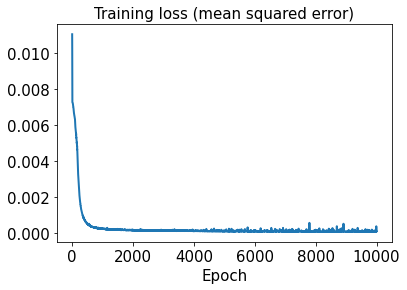

In [35]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

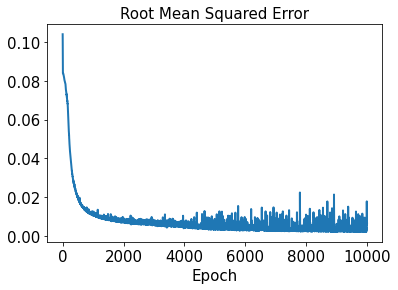

In [36]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [37]:
test_results = sd.evaluate(tsr_theta_train)

13/13 [==============================] - 0s 2ms/step - loss: 4.9972e-05 - rmse: 0.0000e+00


In [38]:
decoded_train = sd.predict(tsr_theta_train)

In [39]:
decoded_test = sd.predict(tsr_theta_test)

In [40]:
error_train_abs = np.abs(decoded_train - y_train)

In [41]:
error_test_abs = np.abs(decoded_test - y_test)

In [42]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.0032489782


In [43]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0071838303


In [44]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.0017827279, 0.0033497345, 0.0017937551, 0.0021677418, 0.004077226, 0.0011213305, 0.0048140856, 0.002735189, 0.0051288344, 0.002540505, 0.005477991, 0.0029110855, 0.0013976578, 0.0028654076, 0.004905352, 0.00384053, 0.0022845336, 0.0027555863, 0.001810967, 0.002316565, 0.0021479551, 0.008058474, 0.0030963093, 0.008274764, 0.0022378701, 0.0018573889, 0.0031003421, 0.0020948777, 0.0026741098, 0.0024450028, 0.0058238166, 0.0026809215, 0.007987386, 0.0031312061, 0.0028703192, 0.002550933, 0.0014257526, 0.0016348851, 0.002092929, 0.0060119038, 0.0024603386, 0.0027565137, 0.0030856733, 0.0067017805, 0.0008336307, 0.0021936465, 0.0034773415, 0.0026094606, 0.005125628, 0.0013028065, 0.0026231129, 0.0024264061, 0.0023415438, 0.0024429436, 0.0022537857, 0.00126407, 0.002044375, 0.0038956078, 0.0033447805, 0.0043036384, 0.002193417, 0.0069798636, 0.0012628721, 0.0029769975, 0.0021907175, 0.0019576964, 0.0018719572, 0.0047359536, 0.0029946822, 0.0019890876, 0.0060392004, 0.0054941997, 0.00217084

In [45]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.03752893, 0.0047776154, 0.002175918, 0.0038269516, 0.0030867301, 0.018510053, 0.015673276, 0.0021848986, 0.0029373753, 0.0025403586, 0.056523, 0.005251552, 0.003156222, 0.003282819, 0.002178703, 0.005795991, 0.0027972013, 0.0024479076, 0.013107146, 0.0022778062, 0.003277847, 0.0013326743, 0.0036398717, 0.002705661, 0.0020663852, 0.0041692997, 0.006805232, 0.0045839823, 0.0024228855, 0.0052732946, 0.0069100372, 0.0050687524, 0.0010284283, 0.002188451, 0.012814409, 0.023185275, 0.0024249752, 0.002010822, 0.0035885195, 0.0040476746, 0.0024875433, 0.005856342, 0.0033985872, 0.0038673745]


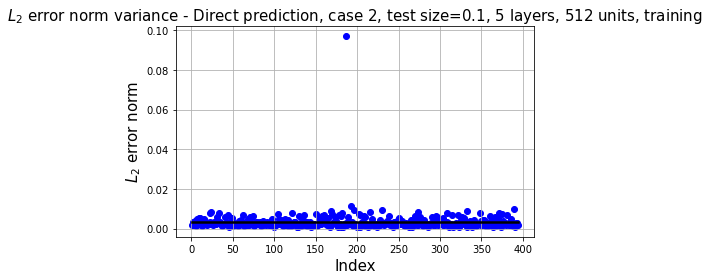

In [46]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.1, 5 layers, 512 units, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

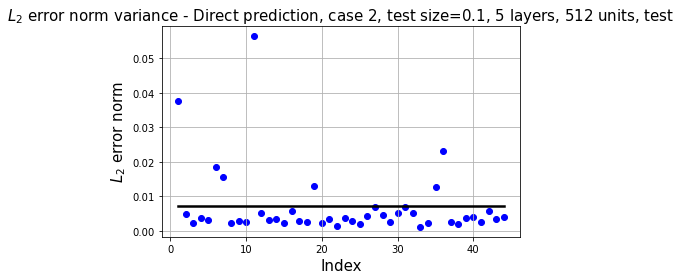

In [47]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.1, 5 layers, 512 units, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

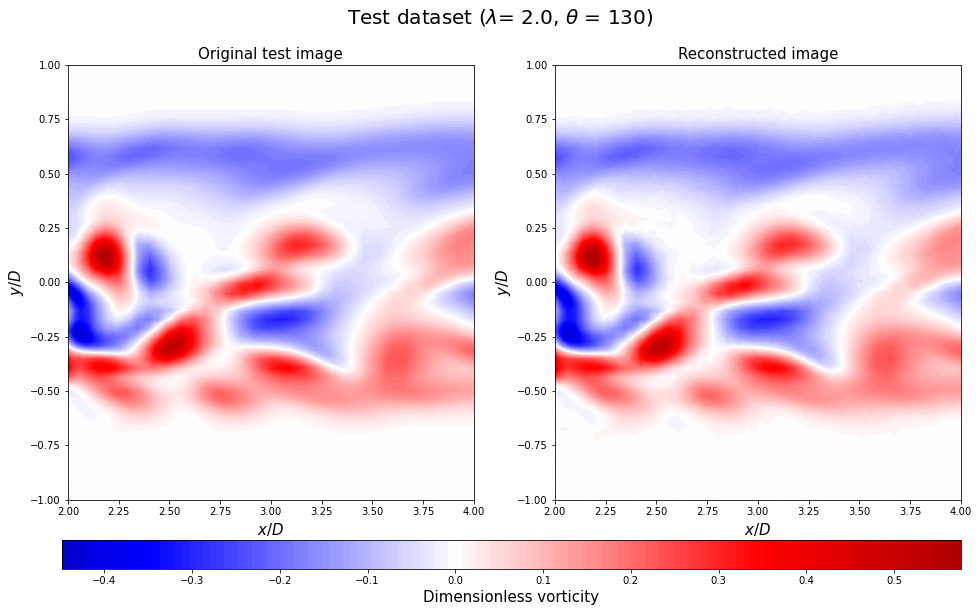

In [48]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

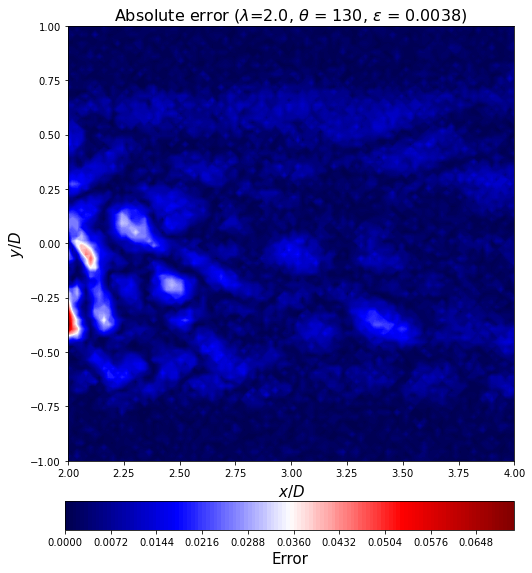

In [49]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()